In [1]:
import cv2
print(cv2.__version__)


4.10.0


**Performing basic transformation operations on a rectangle such as Translation, Scaling, Rotation, Reflection and Shearing**

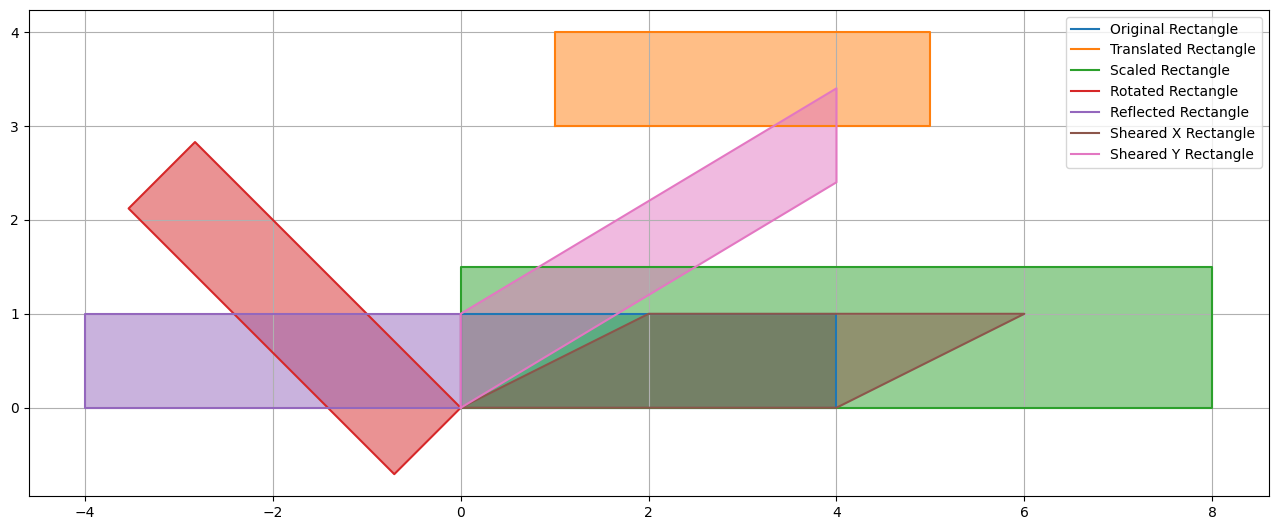

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot 2D shapes
def plot_shape(x, y, label):
    plt.plot(x, y, label=label)
    plt.fill(x, y, alpha=0.5)
    plt.legend()

# Function for translation
def translate(x, y, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    coordinates = np.vstack([x, y, np.ones_like(x)])
    new_coords = translation_matrix @ coordinates
    return new_coords[0], new_coords[1]

# Function for scaling
def scale(x, y, sx, sy):
    scale_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    coordinates = np.vstack([x, y, np.ones_like(x)])
    new_coords = scale_matrix @ coordinates
    return new_coords[0], new_coords[1]

# Function for rotation
def rotate(x, y, angle):
    angle = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0], [0, 0, 1]])
    coordinates = np.vstack([x, y, np.ones_like(x)])
    new_coords = rotation_matrix @ coordinates
    return new_coords[0], new_coords[1]

# Function for reflection (horizontal flip)
def reflect(x, y):
    reflection_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    coordinates = np.vstack([x, y, np.ones_like(x)])
    new_coords = reflection_matrix @ coordinates
    return new_coords[0], new_coords[1]

# Function for shearing in x-direction
def shear_x(x, y, shear_factor):
    shear_matrix = np.array([[1, shear_factor, 0], [0, 1, 0], [0, 0, 1]])
    coordinates = np.vstack([x, y, np.ones_like(x)])
    new_coords = shear_matrix @ coordinates
    return new_coords[0], new_coords[1]

# Function for shearing in y-direction
def shear_y(x, y, shear_factor):
    shear_matrix = np.array([[1, 0, 0], [shear_factor, 1, 0], [0, 0, 1]])
    coordinates = np.vstack([x, y, np.ones_like(x)])
    new_coords = shear_matrix @ coordinates
    return new_coords[0], new_coords[1]

# Example for a rectangle
x = np.array([0, 4, 4, 0, 0])
y = np.array([0, 0, 1, 1, 0])

plt.figure(figsize=(16, 15))
plot_shape(x, y, label='Original Rectangle')

# Perform transformation operations
x1, y1 = translate(x, y, 1, 3)
plot_shape(x1, y1, label='Translated Rectangle')

x2, y2 = scale(x, y, 2, 1.5)
plot_shape(x2, y2, label='Scaled Rectangle')

x3, y3 = rotate(x, y, 135)
plot_shape(x3, y3, label='Rotated Rectangle')

x4, y4 = reflect(x, y)
plot_shape(x4, y4, label='Reflected Rectangle')

x5, y5 = shear_x(x, y, 2)
plot_shape(x5, y5, label='Sheared X Rectangle')

x6, y6 = shear_y(x, y, 0.6)
plot_shape(x6, y6, label='Sheared Y Rectangle')

plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


**Performing composite transformation on rectangle**

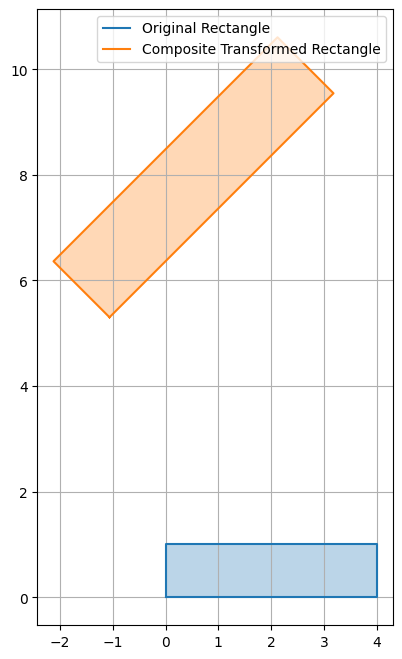

In [35]:
# Function for composite transformation
def composite_transform(x, y, transformations):
    # Start with the identity matrix
    composite_matrix = np.eye(3)
    
    # Multiply transformation matrices in the order they are applied
    for transform in transformations:
        composite_matrix = transform @ composite_matrix
    
    # Apply the composite transformation
    coordinates = np.vstack([x, y, np.ones_like(x)])
    new_coords = composite_matrix @ coordinates
    return new_coords[0], new_coords[1]

# Composite example: Translate, then Scale, then Rotate
translation_matrix = np.array([[1, 0, 2], [0, 1, 3], [0, 0, 1]])  # Translate by (2, 3)
scaling_matrix = np.array([[1.5, 0, 0], [0, 1.5, 0], [0, 0, 1]])  # Scale by 1.5x
rotation_angle = np.radians(45)  # Rotate by 45 degrees
rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle), 0],
                             [np.sin(rotation_angle), np.cos(rotation_angle), 0],
                             [0, 0, 1]])

# Combine transformations: translation -> scaling -> rotation
transformations = [translation_matrix, scaling_matrix, rotation_matrix]

# Perform the composite transformation
x_composite, y_composite = composite_transform(x, y, transformations)

# Plot original and composite transformed shape
plt.figure(figsize=(10, 8))
plot_shape(x, y, label='Original Rectangle')
plot_shape(x_composite, y_composite, label='Composite Transformed Rectangle')

plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


**Performing the basic Perform the basic image transformation operations on the image provided such as Image Translation, Reflection, Rotation, Scaling, Cropping, Shearing in x-axis and Shearing in y-axis**

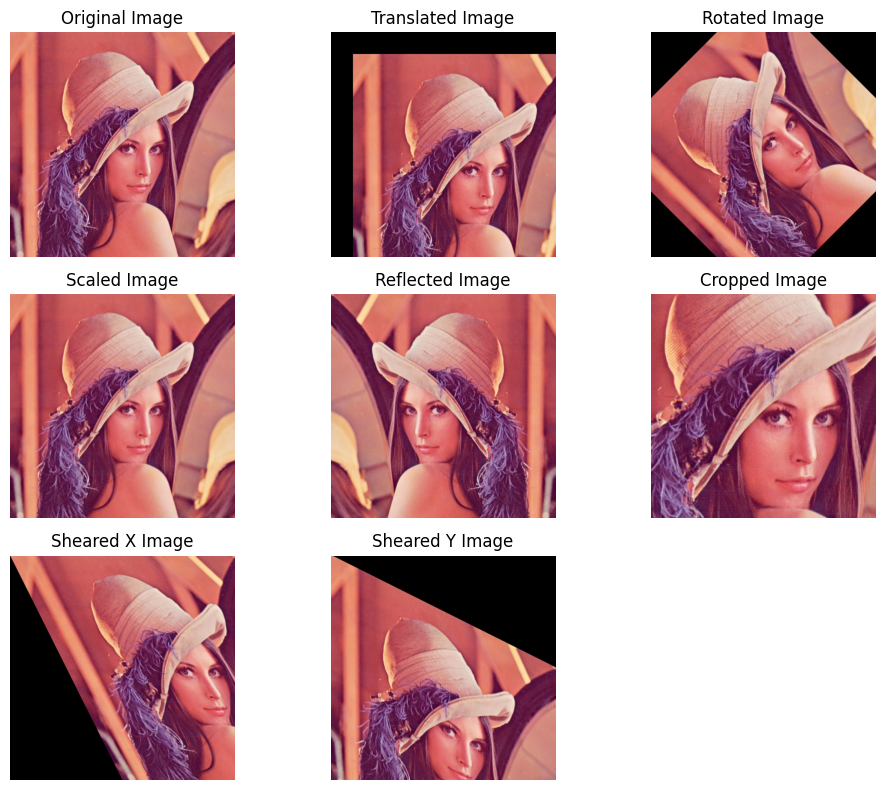

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Lab1_image.jpeg')

# Convert to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Translation
def translate_image(image, tx, ty):
    matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]))

# Rotation
def rotate_image(image, angle):
    center = (image.shape[1] // 2, image.shape[0] // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]))

# Scaling
def scale_image(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy)

# Reflection
def reflect_image(image):
    return cv2.flip(image, 1)  # Flip horizontally

# Cropping
def crop_image(image, x_start, y_start, x_end, y_end):
    return image[y_start:y_end, x_start:x_end]

# Shearing (in x-direction)
def shear_image_x(image, shear_factor):
    rows, cols = image.shape[:2]
    matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    return cv2.warpAffine(image, matrix, (cols, rows))

# Shearing (in y-direction)
def shear_image_y(image, shear_factor):
    rows, cols = image.shape[:2]
    matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    return cv2.warpAffine(image, matrix, (cols, rows))

# Display the transformations
plt.figure(figsize=(10, 8))

# Original Image
plt.subplot(3, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Translation
translated = translate_image(image_rgb, 50, 50)
plt.subplot(3, 3, 2)
plt.imshow(translated)
plt.title("Translated Image")
plt.axis('off')

# Rotation
rotated = rotate_image(image_rgb, 45)
plt.subplot(3, 3, 3)
plt.imshow(rotated)
plt.title("Rotated Image")
plt.axis('off')

# Scaling
scaled = scale_image(image_rgb, 1.5, 1.5)
plt.subplot(3, 3, 4)
plt.imshow(scaled)
plt.title("Scaled Image")
plt.axis('off')

# Reflection
reflected = reflect_image(image_rgb)
plt.subplot(3, 3, 5)
plt.imshow(reflected)
plt.title("Reflected Image")
plt.axis('off')

# Cropping
cropped = crop_image(image_rgb, 100, 100, 400, 400)
plt.subplot(3, 3, 6)
plt.imshow(cropped)
plt.title("Cropped Image")
plt.axis('off')

# Shear X
sheared_x = shear_image_x(image_rgb, 0.5)
plt.subplot(3, 3, 7)
plt.imshow(sheared_x)
plt.title("Sheared X Image")
plt.axis('off')

# Shear Y
sheared_y = shear_image_y(image_rgb, 0.5)
plt.subplot(3, 3, 8)
plt.imshow(sheared_y)
plt.title("Sheared Y Image")
plt.axis('off')

plt.tight_layout()
plt.show()
